1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


C:\Users\feder\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator


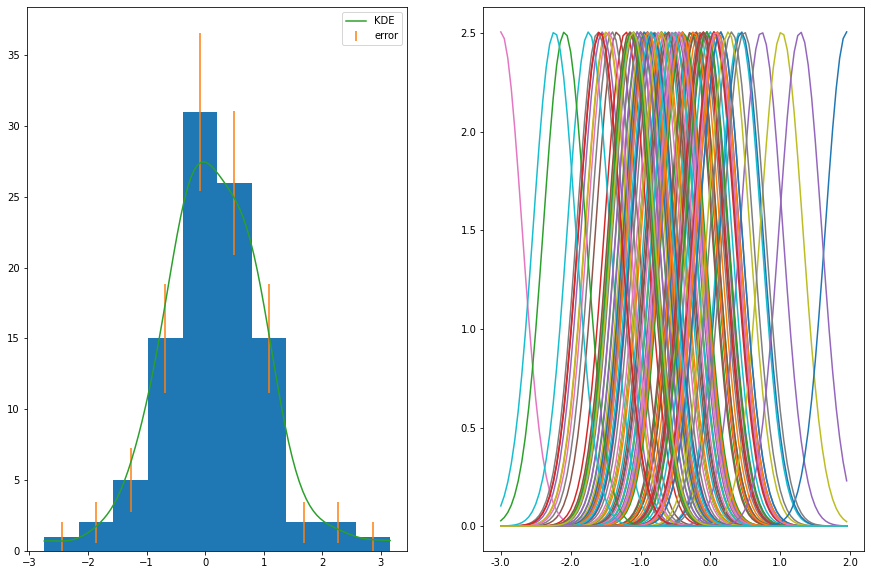

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
import math

x = np.random.normal(0,1, N)
N = 100
fig, ax = plt.subplots(1,2,figsize=(15,10))
n, bins, patches = ax[0].hist(x)
ax[0].set_ylabel="Counts"
bin_centers = 0.5*(bins[1:] + bins[:-1])
ax[0].errorbar(bin_centers,n,yerr = n**0.5,linestyle='None', label = "error")

g_std=1.06*np.std(x)*len(x)**(-1/5)
g_total=0
for m in x:
    g = stats.norm(m, g_std).pdf(np.linspace(np.min(x),np.max(x),N))*2*math.pi*g_std
    ax[1].plot(g)
    g_total += g
    
ax[1].set_xticklabels(ax[0].get_xticks())

norm = sp.integrate.trapz(y=g_total,x=np.linspace(np.min(x),np.max(x),N))
area=sum(n*(bins[1:] - bins[:-1]))
KDE = area*g_total/norm
ax[0].plot(np.linspace(np.min(x),np.max(x),N),KDE, label="KDE")

ax[0].legend()



2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

C:\Users\feder\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: covariance is not positive-semidefinite.
  


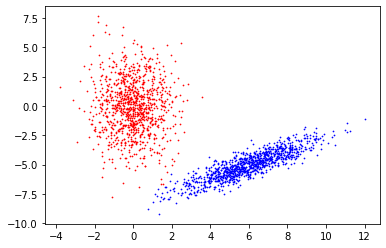

In [70]:
from IPython.display import Image
Image('two_categories_scatter_plot.png')

import scipy.stats as stats
mean1 = [0,0]
cov1=np.diag([1,5])

mean2 = [6,-5]
cov2=[[3,2],[2,1]]

N=10**3

x1, y1 = np.random.multivariate_normal(mean1, cov1, N).T
x2, y2 = np.random.multivariate_normal(mean2, cov2, N).T

plt.scatter(x1,y1,color="r",s=0.5)
plt.scatter(x2,y2,color="b",s=0.5)

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

Slope:0.0032597701220305835
Intercept: -0.15432816763069473


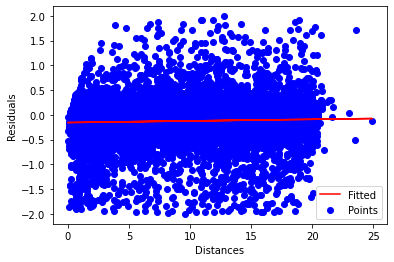

In [9]:
import pandas as pd
import seaborn as sns
import scipy
d = np.load('residuals_261.npy',allow_pickle=True).item()

data = pd.DataFrame(d)
data=data[abs(data.residuals)<2]
data.head()
slope, intercept, r_value, p_value, std_err = stats.linregress(data.distances,data.residuals)
plt.scatter(data.distances,data.residuals,color="b",label="Points")
plt.xlabel("Distances")
plt.ylabel("Residuals")

y = data.distances*slope + intercept
plt.plot(data.distances,y,color="r",label="Fitted")
plt.legend()

print("Slope:" +str(slope))
print("Intercept: "+str(intercept))

[ 0.          1.77857143  3.55714286  5.33571429  7.11428571  8.89285714
 10.67142857 12.45       14.22857143 16.00714286 17.78571429 19.56428571
 21.34285714 23.12142857 24.9       ]


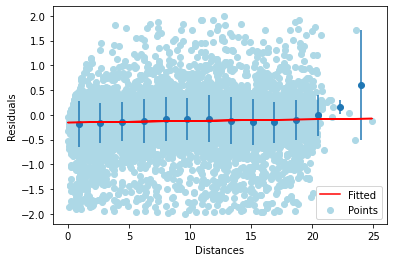

In [13]:
num_bins = math.ceil(math.log(len(data),2))+1 #Sturge’s Rule: A Method for Selecting the Number of Bins 
bin_edges=np.linspace(np.min(data.distances),np.max(data.distances),num_bins)
print(bin_edges)
bin_amp=(bin_edges[1]-bin_edges[0])/2 #its the same for all of them
x=bin_edges+bin_amp
y=[]
erry=[]
for i in range(len(bin_edges)-1):
    mask = (bin_edges[i] <= data["distances"]) & (data["distances"] < bin_edges[i+1])
    y.append(np.mean(data.loc[mask]["residuals"]))
    erry.append(np.std(data.loc[mask]["residuals"]))
    #print(bin_edges)

plt.scatter(data.distances,data.residuals,color="lightblue",label="Points")
plt.xlabel("Distances")
plt.ylabel("Residuals")
plt.scatter(x[:-1],y)
plt.errorbar(x[:-1],y,erry,linestyle='None')
fit = data.distances*slope + intercept
plt.plot(data.distances,fit,color="r",label="Fitted")
plt.legend()
#maybe last bin is due to the fact there not many points fall in that